In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
C = 50
V_r = -60   #V
V_L = -40 #V
k = 1.5  #V

V_pico = 25 #V

a = 0.03   #S
b = 1  #A
c = -40
d = 150

dt = 0.001  #s
tmax = 500    #s

V0 = V_L
u0 = 0

N = round(tmax / dt)   # numero de interacoes

# estilo do grafico
plt.style.use('bmh')

In [27]:
def equacoes(V, u, i_inj):
    dvdt = ( k * (V-V_r) * (V-V_L) - u + i_inj ) / C
    dudt = a * (b * (V-V_r) - u)

    return dvdt, dudt

def euler(I):
    V,u = np.zeros(N), np.zeros(N)
    V[0], u[0] = V0, u0

    for i in range(N-1):
        if V[i] > V_pico:
            u[i] += d
            V[i] = c

        dvdt, dudt = equacoes(V[i], u[i], I[i])
        V[i+1] = V[i] + dt * dvdt
        u[i+1] = u[i] + dt * dudt

    return V, u

def corrente(I, t):
    return  I*(t>=0)

In [28]:
def plot_graficos(correntes):
    for j in range(len(correntes)):
        i_inj = correntes[j]
        t = np.arange(0, tmax, dt)
        I = corrente(i_inj, t)
        V, u = euler(I)

        plt.subplot(2,2,j+1)
        plt.plot(t, V, 'k', label=f'$I = {i_inj} pA$')
        plt.legend()

        if (j+1) % 2 != 0:
            plt.ylabel('$V\;(mV)$')
        if (j+1) == 3 or (j+1) == 4:
            plt.xlabel('$t\;(ms)$')

    plt.show()

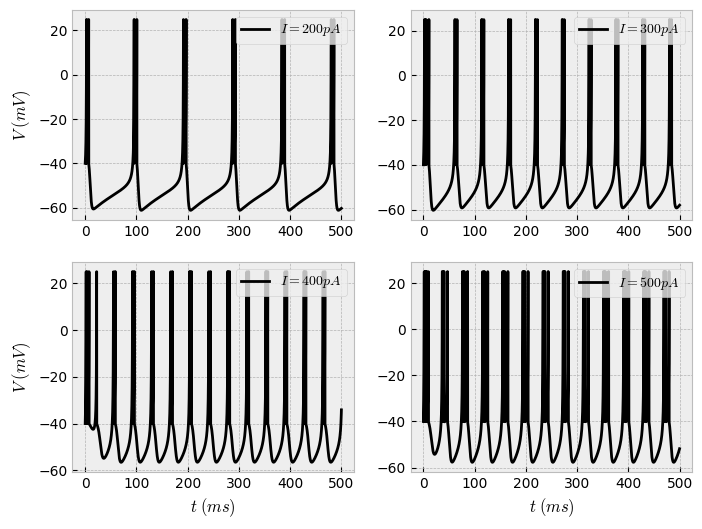

In [29]:
correntes = [200, 300, 400, 500]
plt.figure(figsize=(8,6))
plot_graficos(correntes)